In [60]:
import glob
import h5py
import numpy as np
from einops import rearrange
import matplotlib.pyplot as plt

In [7]:
paths = sorted(glob.glob(f"../data/valid/*.hdf5"))

file = paths[0]

In [8]:
data = []
with h5py.File(file, "r") as f:
    
    def structure(item, indent='  '):
        if isinstance(item, h5py.Group):
            print(f'{indent}[GROUP] {item.name}')
            for key in item.keys():
                structure(item[key], indent + '  ')
        elif isinstance(item, h5py.Dataset):
            print(f'{indent}[DATASET] {item.name}')
            print(f'{indent}  Shape: {item.shape}, Dtype: {item.dtype}')

    structure(f)

  [GROUP] /
    [GROUP] /boundary_conditions
      [GROUP] /boundary_conditions/x_periodic
        [DATASET] /boundary_conditions/x_periodic/mask
          Shape: (256,), Dtype: bool
      [GROUP] /boundary_conditions/y_periodic
        [DATASET] /boundary_conditions/y_periodic/mask
          Shape: (256,), Dtype: bool
    [GROUP] /dimensions
      [DATASET] /dimensions/time
        Shape: (81,), Dtype: float32
      [DATASET] /dimensions/x
        Shape: (256,), Dtype: float32
      [DATASET] /dimensions/y
        Shape: (256,), Dtype: float32
    [GROUP] /scalars
      [DATASET] /scalars/L
        Shape: (), Dtype: float32
      [DATASET] /scalars/alpha
        Shape: (), Dtype: float32
      [DATASET] /scalars/zeta
        Shape: (), Dtype: float32
    [GROUP] /t0_fields
      [DATASET] /t0_fields/concentration
        Shape: (2, 81, 256, 256), Dtype: float32
    [GROUP] /t1_fields
      [DATASET] /t1_fields/velocity
        Shape: (2, 81, 256, 256, 2), Dtype: float32
    [GROUP] /t

In [29]:
with h5py.File(file, "r") as f:
    concentration = f['t0_fields']['concentration'][:]

In [30]:
concentration_1 = concentration[0, :, :, :]
concentration_2 = concentration[1, :, :, :]

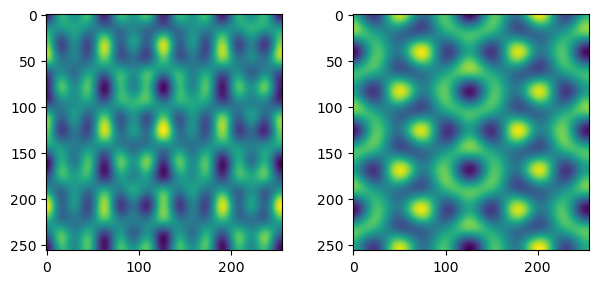

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(7, 7))

axs[0].imshow(concentration_1[0])
axs[1].imshow(concentration_2[0])

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [32]:
from the_well.data import WellDataset

In [35]:
dataset = WellDataset(
    well_base_path='../../project03_data/datasets/',
    well_dataset_name='active_matter',
    well_split_name='valid',
    n_steps_input=1,
    n_steps_output=1
)

In [48]:
dataset.metadata.field_names

{0: ['concentration'],
 1: ['velocity_x', 'velocity_y'],
 2: ['D_xx', 'D_xy', 'D_yx', 'D_yy', 'E_xx', 'E_xy', 'E_yx', 'E_yy']}

In [50]:
F = dataset.metadata.n_fields

In [77]:
field_names = [
    name for group in dataset.metadata.field_names.values() for name in group
]

In [61]:
x = dataset[42]['input_fields']
x = rearrange(x, "T Lx Ly F -> F T Lx Ly")

In [73]:
x[0, 0]

tensor([[1.0015, 1.0015, 1.0016,  ..., 1.0014, 1.0014, 1.0015],
        [1.0014, 1.0015, 1.0015,  ..., 1.0013, 1.0013, 1.0014],
        [1.0014, 1.0014, 1.0014,  ..., 1.0012, 1.0013, 1.0013],
        ...,
        [1.0016, 1.0016, 1.0016,  ..., 1.0016, 1.0016, 1.0016],
        [1.0016, 1.0016, 1.0016,  ..., 1.0015, 1.0015, 1.0016],
        [1.0016, 1.0016, 1.0016,  ..., 1.0014, 1.0015, 1.0015]])

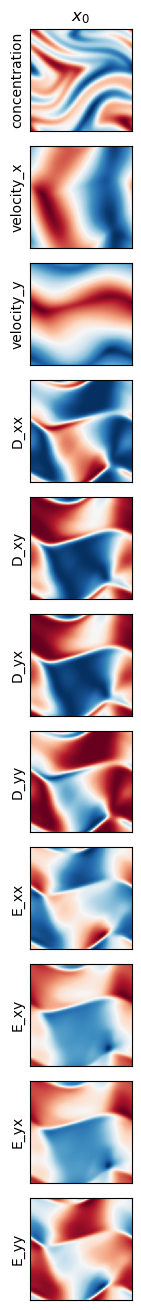

In [83]:
fig, axs = plt.subplots(F, 1, figsize=(4 * 2.4, F * 1.2))

for field in range(F):
    vmin = np.nanmin(x[field])
    vmax = np.nanmax(x[field])

    axs[field].set_ylabel(f"{field_names[field]}")

    for t in range(1):
        axs[field].imshow(
            x[field, t], cmap="RdBu_r", interpolation="none", vmin=vmin, vmax=vmax
        )
        axs[field].set_xticks([])
        axs[field].set_yticks([])

        axs[0].set_title(f"$x_{t}$")

plt.tight_layout()
